# Задание 1

In [22]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math

In [23]:
def F(t, y):
    r12x, r12y, r13x, r13y, v2x, v2y, v3x, v3y = y
    r2 = math.sqrt(r12x ** 2 + r12y ** 2)
    r3 = math.sqrt(r13x ** 2 + r13y ** 2)
    r23x = r13x - r12x
    r23y = r13y - r12y
    r = math.sqrt(r23x ** 2 + r23y ** 2)
    return [v2x, v2y, v3x, v3y,
            G * (-(m1 / (r2 ** 3) * r12x) + (m3 / (r ** 3) * r23x)),
            G * (-(m1 / (r2 ** 3) * r12y) + (m3 / (r ** 3) * r23y)),
            G * (-(m1 / (r3 ** 3) * r13x) - (m2 / (r ** 3) * r23x)),
            G * (-(m1 / (r3 ** 3) * r13y) - (m2 / (r ** 3) * r23y))]

In [24]:
m1, m2, m3 = 2 * (10 ** 30), 1.9 * (10 ** 27), 1.5 * (10 ** 23)
G = 6.67 * (10 ** -11)
t_span = (0, 0 * 3000000000)
tau = 1000
y0 = [780 * (10 ** 9), 0, 780 * (10 ** 9) + 1070 * (10 ** 6), 0, 0, 13000, 0, 23900]

In [25]:
ox1, oy1, ox100, oy100, ox500, oy500, ox1000, oy1000 = [], [], [], [], [], [], [], []
orbitsx = [[] for i in range(1200)]
orbitsy = [[] for i in range(1200)]


def event(x, y):
    if not hasattr(event, "counter"):
        event.counter = 0
    if not hasattr(event, "lastvalue"):
        event.lastvalue = y[3] - y[1]
    if not hasattr(event, "xstop"):
        event.xstop = -1
    orbitsx[int(event.counter / 2)].append(y[2] - y[0])
    orbitsy[int(event.counter / 2)].append(y[3] - y[1])
    if (y[3] - y[1]) * event.lastvalue < 0:
        event.counter += 1
    if y[3] - y[1] != 0:
        event.lastvalue = y[3] - y[1]
    if ((event.counter >= 2000 and (abs(y[0] / math.sqrt(y[0] ** 2 + y[1] ** 2) - (y[2] - y[0]) / math.sqrt(
            (y[2] - y[0]) ** 2 + (y[3] - y[1]) ** 2)) < 0.001) and
         (abs(y[1] / math.sqrt(y[0] ** 2 + y[1] ** 2) - (y[3] - y[1]) / math.sqrt(
             (y[2] - y[0]) ** 2 + (y[3] - y[1]) ** 2)) < 0.001)) and
            (math.sqrt(y[0] ** 2 + y[1] ** 2) < math.sqrt(y[2] ** 2 + y[3] ** 2))):
        event.xstop = x
    return x - event.xstop

In [26]:
solution = solve_ivp(F, t_span, y0, max_step=tau, atol=1, rtol=1, method="RK45",events=event)

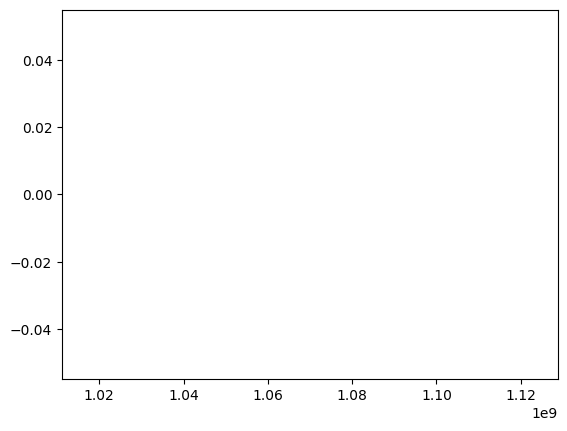

In [27]:
plt.plot(orbitsx[0], orbitsy[0], linestyle='--', label='1 оборот')